# Assessing a model: Jury selection

In [6]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Simulate one value of the statistic

In [12]:
#Sample size is the size of the panel
sample_size = 100

#Distribution of the sample based on the population of eligible jurors (26% Black men)
eligible_population = [0.26, 0.74]

In [21]:
sample_proportions(sample_size, eligible_population).item(0)

0.22

In [8]:
#This function will draw a panel at random and return the number of panelists who are Black.

def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

## Simulating multiple values of the statistic

In [31]:
#The focus of our analysis is the variability (diversity) in the counts. 
#Generate 10,000 simulated values of the count and see how they vary.

counts = make_array() #makes a list
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

## Visualizing our results with the simulated counts (random selection)

This histogram shows us what the model of random selection can tell us about the number of Black panelists in the sample. 

This is simulated through drawing 100 times at random from a population where 26% were Black. Most of the drawing are centered around the statistic of 26% Black panelists, though some variation is observed (range from ~15 to ~40).

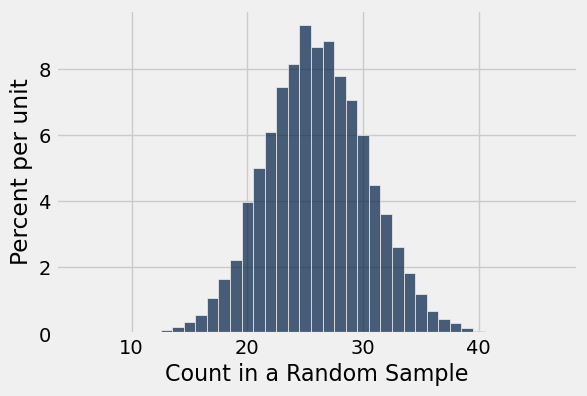

In [32]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

# Comparing prediction and data

The histogram is redrawn with the demonstration of where the model of 8% black panelists will fall in out distribution. Very few of the simulated 10,000 counts by random selection came out to 8 or less.

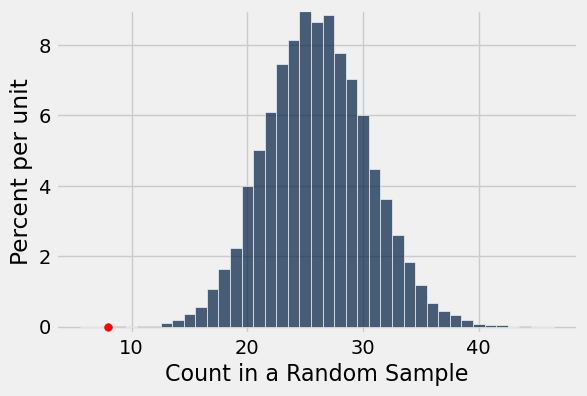

In [33]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);